### Regression using numpy (with pandas and pyplot)

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [3]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

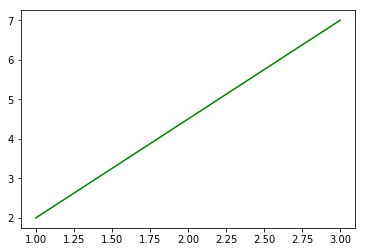

In [4]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

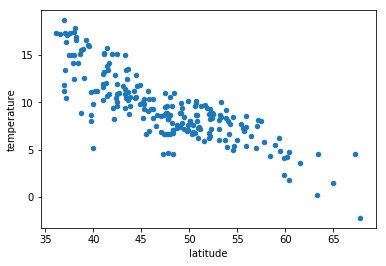

In [5]:
# Recall latitude versus temperature scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

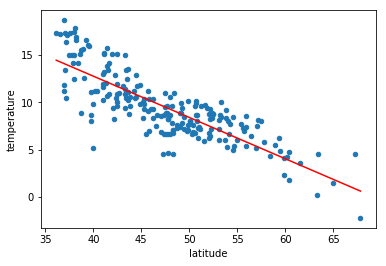

In [6]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Beautify using plt.xlim(x1,x2)

In [7]:
# Correlation coefficients (r values)
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print 'Correlation coefficient for latitude versus temperature:', cc
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print 'Correlation coefficient for longitude versus temperature:', cc

Correlation coefficient for latitude versus temperature: -0.824104632027
Correlation coefficient for longitude versus temperature: -0.169307504036


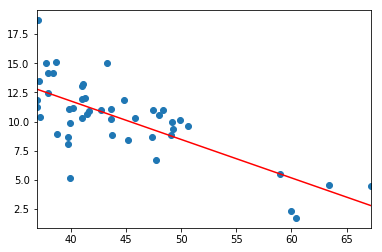

Enter city name (or "quit" to quit): amsterdam
City not in dataset
Enter city name (or "quit" to quit): Amsterdam
Predicted temperature: 7.68855452617
Actual temperature: 8.93
Enter city name (or "quit" to quit): Aalborg
Predicted temperature: 6.14631954347
Actual temperature: 7.52
Enter city name (or "quit" to quit): Ancona
Predicted temperature: 10.572006684
Actual temperature: 13.52
Enter city name (or "quit" to quit): Bari
Predicted temperature: 11.3925547838
Actual temperature: 15.15
Enter city name (or "quit" to quit): Basel
Predicted temperature: 9.26044787392
Actual temperature: 6.68
Enter city name (or "quit" to quit): Belgrade
Predicted temperature: 10.1699710688
Actual temperature: 9.85
Enter city name (or "quit" to quit): Aberdeen
Predicted temperature: 6.10018430895
Actual temperature: 8.1
Enter city name (or "quit" to quit): Barcelona
Predicted temperature: 11.3035796886
Actual temperature: 15.78
Enter city name (or "quit" to quit): quit


In [8]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = raw_input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print 'City not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted temperature:', a * float(city.latitude) + b
        print 'Actual temperature:', float(city.temperature)

### <font color="green">Your Turn: World Cup Data</font>

In [20]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

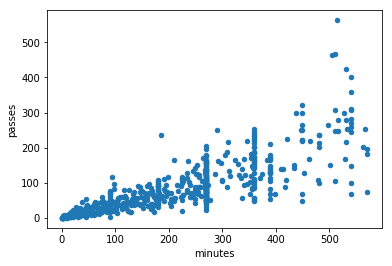

In [21]:
# From the players data, compute and plot a linear regression for
# minutes played (x-axis) versus passes made (y-axis).
# Reminder: copy-paste-modify approach to programming!
players.plot.scatter(x='minutes', y='passes')
plt.show()

In [22]:
# Show the correlation coefficient for the minutes-passes regression.
# Also show correlation coefficients for minutes played versus
# tackles, minutes played versus shots, and minutes played versus saves
cc2 = np.corrcoef(players.minutes, players.passes)[1,0]
cc3 = np.corrcoef(players.minutes, players.tackles)[1,0]
cc4 = np.corrcoef(players.minutes, players.shots)[1,0]
cc5 = np.corrcoef(players.minutes, players.saves)[1,0]
print "Correlation for minutes vs passes: ", cc2
print "Correlation for minutes vs tackles: ", cc3
print "Correlation for minutes vs shots: ", cc4
print "Correlation for minutes vs saves: ", cc5


Correlation for minutes vs passes:  0.815119315795
Correlation for minutes vs tackles:  0.610673461384
Correlation for minutes vs shots:  0.407923077405
Correlation for minutes vs saves:  0.228477232531


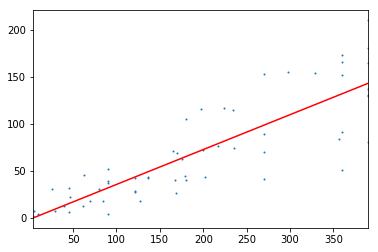

Enter player surname (or "quit" to quit): Higuain
Predicted Passes: 124.710336843
Actual Passes: 93.0
Enter player surname (or "quit" to quit): Bolatti
Predicted Passes: 34.5911070888
Actual Passes: 97.0
Enter player surname (or "quit" to quit): Burdisso
Predicted Passes: 124.710336843
Actual Passes: 167.0
Enter player surname (or "quit" to quit): Di Maria
Predicted Passes: 130.27325226
Actual Passes: 148.0
Enter player surname (or "quit" to quit): Kaka
Predicted Passes: 123.226892732
Actual Passes: 139.0
Enter player surname (or "quit" to quit): Messi
Predicted Passes: 165.134188873
Actual Passes: 321.0
Enter player surname (or "quit" to quit): Heinze
Predicted Passes: 131.756696371
Actual Passes: 188.0
Enter player surname (or "quit" to quit): Aguero
Predicted Passes: 37.5579953112
Actual Passes: 57.0
Enter player surname (or "quit" to quit): Ziani
Predicted Passes: 87.2533730358
Actual Passes: 93.0
Enter player surname (or "quit" to quit): Yebda
Predicted Passes: 98.0083428418
Actua

In [63]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
players_training = players[(players.team == "Greece") | (players.team == "USA") | (players.team == "Portugal")]
plt.scatter(players_training.minutes, players_training.passes, 1)
a,b = np.polyfit(players_training.minutes, players_training.passes, 1)
x1 = min(players_training.minutes)
x2 = max(players_training.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = raw_input('Enter player surname (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print 'Player not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted Passes:', a * float(player.minutes) + b
        print 'Actual Passes:', float(player.passes)

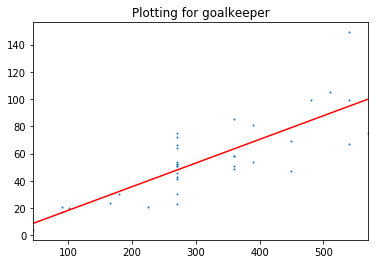

a for goalkeeper is 0.173494787256
b for goalkeeper is 1.00248880214 



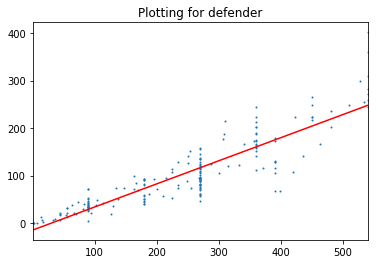

a for defender is 0.487391915992
b for defender is -15.1159734048 



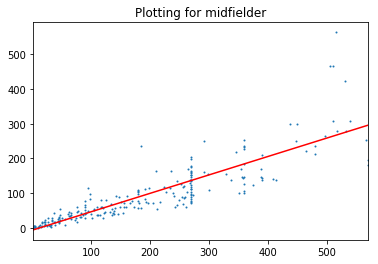

a for midfielder is 0.529181374659
b for midfielder is -6.0987970158 



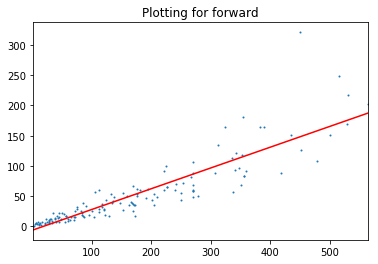

a for forward is 0.343703280974
b for forward is -6.46992176127 



In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string

polyfits = []

def plotChart(data, position):
    plt.scatter(data.minutes, data.passes, 1)
    a,b = np.polyfit(data.minutes, data.passes, 1)
    polyfits.append([a,b])
    x1 = min(data.minutes)
    x2 = max(data.minutes)
    plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
    plt.xlim(x1,x2)
    plt.title("Plotting for " + position)
    plt.show()
    print "a for", position, "is", a
    print "b for", position, "is", b, "\n"

# players_training = players[(players.team == "Greece") | (players.team == "USA") | (players.team == "Portugal")]
players_training = players

players_goalkeeper = players_training[players_training.position == "goalkeeper"]
players_defender = players_training[players_training.position == "defender"]
players_midfielder = players_training[players_training.position == "midfielder"]
players_forward = players_training[players_training.position == "forward"]

plotChart(players_goalkeeper, "goalkeeper")
plotChart(players_defender, "defender")
plotChart(players_midfielder, "midfielder")
plotChart(players_forward, "forward")

# plt.scatter(players_training.minutes, players_training.passes, 1)
# a,b = np.polyfit(players_training.minutes, players_training.passes, 1)
# x1 = min(players_training.minutes)
# x2 = max(players_training.minutes)
# plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
# plt.xlim(x1,x2)
# plt.show()

# a1,b1 = np.polyfit(players_goalkeeper.minutes, players_goalkeeper.passes, 1)
# a2,b2 = np.polyfit(players_defender.minutes, players_defender.passes, 1)
# a3,b3 = np.polyfit(players_midfielder.minutes, players_midfielder.passes, 1)
# a4,b4 = np.polyfit(players_forward.minutes, players_forward.passes, 1)
    
positions = {'goalkeeper': 0, 'defender': 1, 'midfielder': 2, 'forward': 3}
# polyfits = [[a1,b1], [a2,b2], [a3,b3], [a4,b4]]

# for i in range(len(polyfits)):
#     print "a for", positions.keys()[positions.values().index(i)], "is", polyfits[i][0]
#     print "b for", positions.keys()[positions.values().index(i)], "is", polyfits[i][1], "\n"

    # Loop asking user for city name, compute predicted + actual temperature
while True:
    name = raw_input('Enter player surname (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    player_position = player.iloc[0].position
    polyfit = polyfits[positions[player_position]]
    if len(player) == 0:
        print 'Player not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted Passes using regression for', player_position + 's:', polyfit[0] * float(player.minutes) + polyfit[1]
        print 'Predicted Passes using general regression:', a * float(player.minutes) + b
        print 'Actual Passes:', float(player.passes), "\n"